In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# universe of discourse for input and output variables with a range up to 100
vehicle_speed = ctrl.Antecedent(np.arange(0, 101, 1), 'vehicleSpeed')
brake_pressure = ctrl.Antecedent(np.arange(0, 102, 1), 'brakePressure')
brake_actuation = ctrl.Consequent(np.arange(0, 101, 1), 'brakeActuation')

# membership functions for the input variables
vehicle_speed['slow'] = fuzz.trimf(vehicle_speed.universe, [0, 0, 40])
vehicle_speed['medium'] = fuzz.trimf(vehicle_speed.universe, [30, 50, 70])
vehicle_speed['fast'] = fuzz.trapmf(vehicle_speed.universe, [60, 80, 100, 100])

brake_pressure['none'] = fuzz.trimf(brake_pressure.universe, [0,  0, 10])
brake_pressure['light'] = fuzz.trimf(brake_pressure.universe, [0, 30, 55])
brake_pressure['moderate'] = fuzz.trimf(brake_pressure.universe, [40, 70, 100])
brake_pressure['heavy'] = fuzz.trapmf(brake_pressure.universe, [70, 100, 102,102])

# membership functions for the output variable
brake_actuation['release'] = fuzz.trimf(brake_actuation.universe, [0, 0, 50])
brake_actuation['partial_application'] = fuzz.trimf(brake_actuation.universe, [0, 50, 100])
brake_actuation['full_application'] = fuzz.trimf(brake_actuation.universe, [50, 100, 100])

| Rule  | Vehicle Speed | Brake Pressure | Brake Actuation   |
|:----- |:------------- |:-------------- |:------------------ |
| Rule 1 | Slow         | None           | Release           |
| Rule 2 | Slow         | Light          | Full Application |
| Rule 3 | Slow         | Moderate       | Partial Application|
| Rule 4 | Slow         | Heavy          | Partial Application|
| Rule 5 | Medium       | None           | Release           |
| Rule 6 | Medium       | Light          | Partial Application|
| Rule 7 | Medium       | Moderate       | Partial Application|
| Rule 8 | Medium       | Heavy          | Partial Application|
| Rule 9 | Fast         | None           | Release           |
| Rule 10 | Fast        | Light          | Full Application   |
| Rule 11 | Fast        | Moderate       | Partial Application|
| Rule 12 | Fast        | Heavy          | Partial Application|


In [2]:
# Define the rules
rule1 = ctrl.Rule(vehicle_speed['slow'] & brake_pressure['none'], brake_actuation['release'])
rule2 = ctrl.Rule(vehicle_speed['slow'] & brake_pressure['light'], brake_actuation['full_application'])
rule3 = ctrl.Rule(vehicle_speed['slow'] & brake_pressure['moderate'], brake_actuation['partial_application'])
rule4 = ctrl.Rule(vehicle_speed['slow'] & brake_pressure['heavy'], brake_actuation['partial_application'])

rule5 = ctrl.Rule(vehicle_speed['medium'] & brake_pressure['none'], brake_actuation['release'])
rule6 = ctrl.Rule(vehicle_speed['medium'] & brake_pressure['light'], brake_actuation['partial_application'])
rule7 = ctrl.Rule(vehicle_speed['medium'] & brake_pressure['moderate'], brake_actuation['partial_application'])
rule8 = ctrl.Rule(vehicle_speed['medium'] & brake_pressure['heavy'], brake_actuation['partial_application'])

rule9 = ctrl.Rule(vehicle_speed['fast'] & brake_pressure['none'], brake_actuation['release'])
rule10 = ctrl.Rule(vehicle_speed['fast'] & brake_pressure['light'], brake_actuation['full_application'])
rule11 = ctrl.Rule(vehicle_speed['fast'] & brake_pressure['moderate'], brake_actuation['partial_application'])
rule12 = ctrl.Rule(vehicle_speed['fast'] & brake_pressure['heavy'], brake_actuation['partial_application'])

# Input Speed and Brake pressure

In [3]:
# Inputs
speed_input = 80
brake_pressure_input = 20

In [4]:
# Create the control system
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

# Create a simulation
brake_system = ctrl.ControlSystemSimulation(system)

# Provide input values (e.g., both set to 100 for the maximum values)
brake_system.input['vehicleSpeed'] = speed_input
brake_system.input['brakePressure'] = brake_pressure_input

# Compute the result
brake_system.compute()

# Access the output value
output_value = brake_system.output['brakeActuation']

print("Brake Actuation:", output_value)

Brake Actuation: 81.94444444444441


# Visualization

D:\annaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


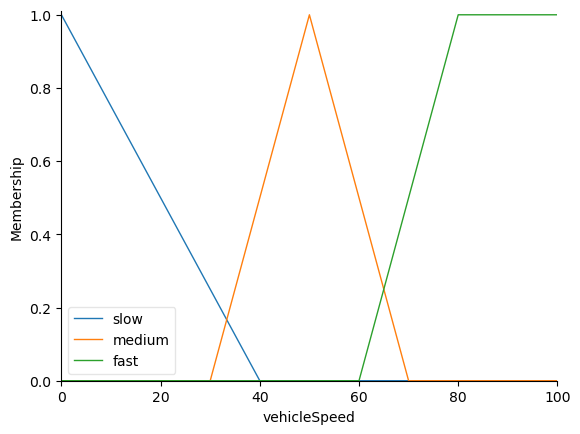

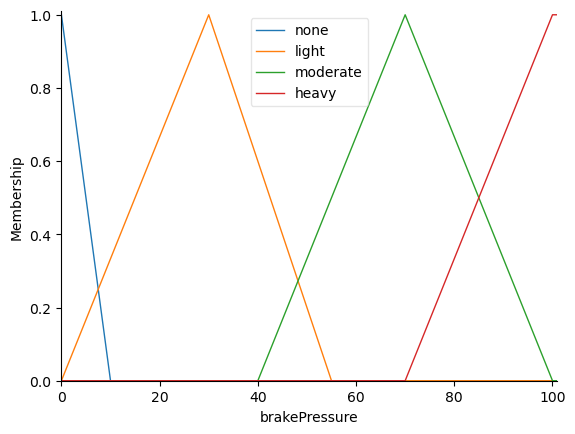

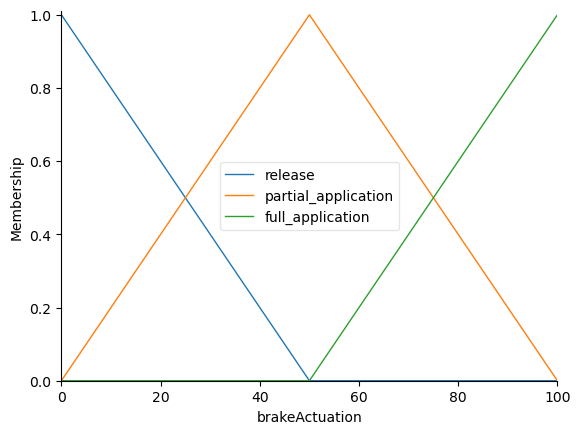

In [5]:
# To visualize the fuzzy membership functions and rules
vehicle_speed.view()
brake_pressure.view()
brake_actuation.view()


# Display the plots
import matplotlib.pyplot as plt
plt.show()


In [14]:
# Define the input universe and the input value
input_universe = np.arange(0, 101, 1)
input_value = speed_input

# Define the membership functions for different fuzzy terms
slow_membership = fuzz.trimf(input_universe, [0, 20, 40])
medium_membership = fuzz.trimf(input_universe, [30, 50, 70])
fast_membership = fuzz.trapmf(input_universe, [60, 80, 100, 100])

# Calculate the membership values for the input value in each term
membership_slow = fuzz.interp_membership(input_universe, slow_membership, input_value)
membership_medium = fuzz.interp_membership(input_universe, medium_membership, input_value)
membership_fast = fuzz.interp_membership(input_universe, fast_membership, input_value)

In [15]:
# Define the input universe and the input value for brake pressure
brake_pressure_universe = np.arange(0, 101, 1)
brake_pressure_input = brake_pressure_input

# Define the membership functions for different brake pressure terms
brake_pressure_none = fuzz.trimf(brake_pressure_universe, [0, 0, 10])
brake_pressure_light = fuzz.trimf(brake_pressure_universe, [0, 15, 25])
brake_pressure_moderate = fuzz.trimf(brake_pressure_universe, [20, 40, 60])
brake_pressure_heavy = fuzz.trimf(brake_pressure_universe, [50, 70, 100])

# Calculate the membership values for the input value in each term
membership_none = fuzz.interp_membership(brake_pressure_universe, brake_pressure_none, brake_pressure_input)
membership_light = fuzz.interp_membership(brake_pressure_universe, brake_pressure_light, brake_pressure_input)
membership_moderate = fuzz.interp_membership(brake_pressure_universe, brake_pressure_moderate, brake_pressure_input)
membership_heavy = fuzz.interp_membership(brake_pressure_universe, brake_pressure_heavy, brake_pressure_input)


# Membership Value

In [16]:
print(f'Membership in "slow": {membership_slow}')
print(f'Membership in "medium": {membership_medium}')
print(f'Membership in "fast": {membership_fast}')
print('\n')
print(f'Membership in "none": {membership_none}')
print(f'Membership in "light": {membership_light}')
print(f'Membership in "moderate": {membership_moderate}')
print(f'Membership in "heavy": {membership_heavy}')

Membership in "slow": 0.0
Membership in "medium": 0.0
Membership in "fast": 1.0


Membership in "none": 0.0
Membership in "light": 0.5
Membership in "moderate": 0.0
Membership in "heavy": 0.0


In [9]:
# Apply the rules
rule_activations = []

rule_activations.append(min(membership_slow, membership_none))
rule_activations.append(min(membership_slow, membership_light))
rule_activations.append(min(membership_slow, membership_moderate))
rule_activations.append(min(membership_slow, membership_heavy))
rule_activations.append(min(membership_medium, membership_none))
rule_activations.append(min(membership_medium, membership_light))
rule_activations.append(min(membership_medium, membership_moderate))
rule_activations.append(min(membership_medium, membership_heavy))
rule_activations.append(min(membership_fast, membership_none))
rule_activations.append(min(membership_fast, membership_light))
rule_activations.append(min(membership_fast, membership_moderate))
rule_activations.append(min(membership_fast, membership_heavy))

In [10]:
c = 1
for rule_activation in rule_activations:
    print(f"rule{c}: {rule_activation}")
    c += 1

rule1: 0.0
rule2: 0.0
rule3: 0.0
rule4: 0.0
rule5: 0.0
rule6: 0.0
rule7: 0.0
rule8: 0.0
rule9: 0.0
rule10: 0.5
rule11: 0.0
rule12: 0.0


# Finding COG

In [11]:
# Create the control system
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

# Create a simulation
brake_system = ctrl.ControlSystemSimulation(system)

# Provide input values (e.g., both set to 100 for the maximum values)
brake_system.input['vehicleSpeed'] = speed_input
brake_system.input['brakePressure'] = brake_pressure_input

# Compute the result
brake_system.compute()

# Access the output value
output_value = brake_system.output['brakeActuation']

print("Brake Actuation:", output_value)

Brake Actuation: 81.94444444444441


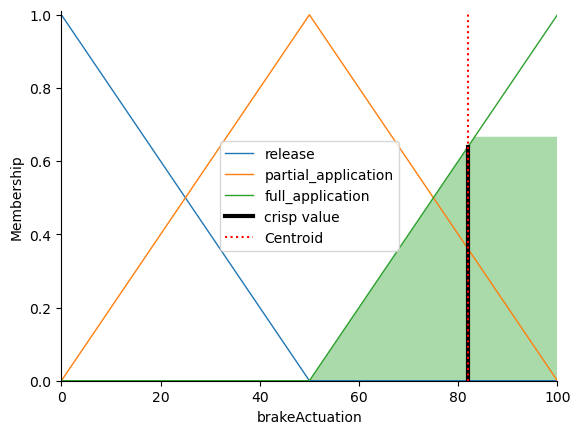

In [12]:
brake_actuation.view(sim=brake_system)

# Centroid
plt.axvline(x=brake_system.output['brakeActuation'],color = 'r',linestyle='dotted', label= 'Centroid')

plt.legend()
plt.show()